In [1]:
from fastai.vision.all import *
from fastai.callback.wandb import *
import wandb

In [2]:
path = untar_data(URLs.PETS)/'images'

In [44]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

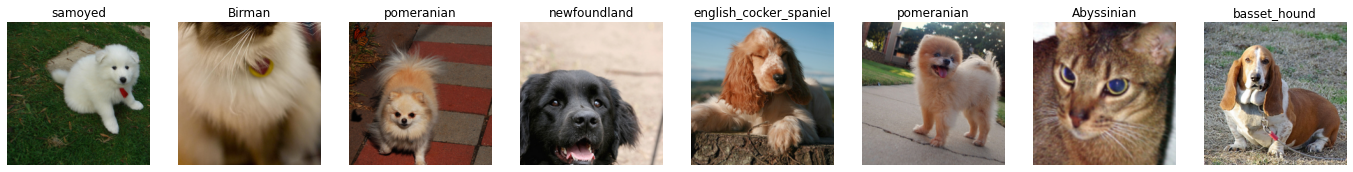

In [45]:
dls = pets.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1)

In [46]:
from timm import create_model
import timm
timm.list_models('*vit*', pretrained=True)

['convit_base',
 'convit_small',
 'convit_tiny',
 'crossvit_9_240',
 'crossvit_9_dagger_240',
 'crossvit_15_240',
 'crossvit_15_dagger_240',
 'crossvit_15_dagger_408',
 'crossvit_18_240',
 'crossvit_18_dagger_240',
 'crossvit_18_dagger_408',
 'crossvit_base_240',
 'crossvit_small_240',
 'crossvit_tiny_240',
 'levit_128',
 'levit_128s',
 'levit_192',
 'levit_256',
 'levit_384',
 'mobilevit_s',
 'mobilevit_xs',
 'mobilevit_xxs',
 'vit_base_patch8_224',
 'vit_base_patch8_224_dino',
 'vit_base_patch8_224_in21k',
 'vit_base_patch16_224',
 'vit_base_patch16_224_dino',
 'vit_base_patch16_224_in21k',
 'vit_base_patch16_224_miil',
 'vit_base_patch16_224_miil_in21k',
 'vit_base_patch16_224_sam',
 'vit_base_patch16_384',
 'vit_base_patch32_224',
 'vit_base_patch32_224_in21k',
 'vit_base_patch32_224_sam',
 'vit_base_patch32_384',
 'vit_base_r50_s16_224_in21k',
 'vit_base_r50_s16_384',
 'vit_huge_patch14_224_in21k',
 'vit_large_patch16_224',
 'vit_large_patch16_224_in21k',
 'vit_large_patch16_384',

WandbCallback requires use of "SaveModelCallback" to log best model


epoch,train_loss,valid_loss,accuracy,time
0,3.262694,2.646588,0.853180,00:32


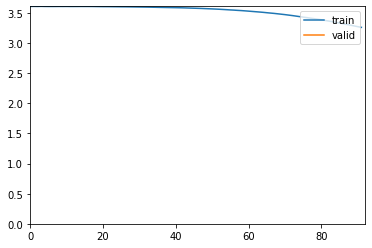

epoch,train_loss,valid_loss,accuracy,time
0,2.556039,2.373157,0.880920,00:31
1,2.197012,1.844367,0.900541,00:30
2,1.635405,1.250877,0.913396,00:31
3,1.213990,0.991514,0.933018,00:31
4,1.004293,0.896157,0.937754,00:31
5,0.911176,0.863895,0.937754,00:31
6,0.866435,0.852261,0.943843,00:30
7,0.832722,0.839449,0.945196,00:31
8,0.827801,0.841043,0.944520,00:30
9,0.817126,0.838126,0.943166,00:30


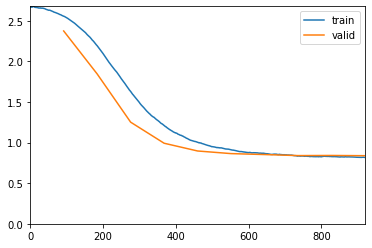

accuracy,▁▃▅▆▇▇▇████
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▃▆█▂▂▂▂▃▃▄▄▄▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
mom_0,█▆▃▁██▇▆▅▄▃▂▂▁▁▁▁▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▇▇▇█████
raw_loss,███▇▆▅▅▅▅▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sqr_mom_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,███▇▆▆▅▅▅▅▅▄▄▄▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_loss,█▇▅▃▂▁▁▁▁▁▁
wd_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.94317


WandbCallback requires use of "SaveModelCallback" to log best model


epoch,train_loss,valid_loss,accuracy,time
0,3.367226,2.927740,0.759134,00:27


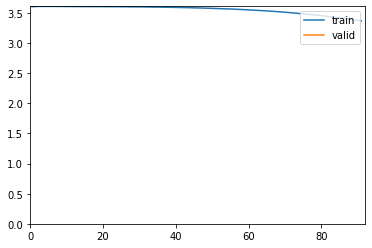

epoch,train_loss,valid_loss,accuracy,time
0,2.874525,2.756184,0.780108,00:31
1,2.597852,2.319391,0.806495,00:30
2,2.112323,1.724985,0.832206,00:29
3,1.654806,1.377626,0.847767,00:28
4,1.350755,1.162363,0.888363,00:27
5,1.176528,1.054728,0.911367,00:27
6,1.084263,1.012941,0.915426,00:27
7,1.033403,0.989248,0.910014,00:27
8,1.003203,0.984581,0.914750,00:27
9,0.996350,0.978271,0.918133,00:27


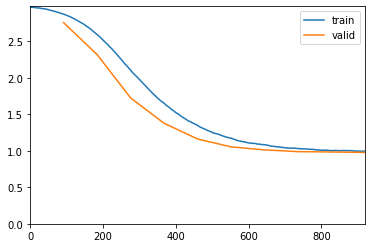

accuracy,▁▂▃▄▅▇█████
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▃▆█▂▂▂▂▃▃▄▄▄▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
mom_0,█▆▃▁██▇▆▅▄▃▂▂▁▁▁▁▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▇▇▇█████
raw_loss,███▇▆▆▆▆▆▅▅▅▄▄▃▃▃▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sqr_mom_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,████▆▆▆▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_loss,█▇▆▄▂▂▁▁▁▁▁
wd_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.91813


WandbCallback requires use of "SaveModelCallback" to log best model


epoch,train_loss,valid_loss,accuracy,time
0,3.408890,3.133155,0.637348,00:22


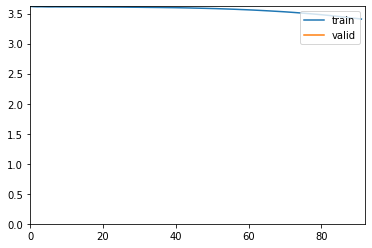

epoch,train_loss,valid_loss,accuracy,time
0,2.990745,2.905704,0.746279,00:22
1,2.777434,2.561425,0.755751,00:21
2,2.401686,2.068294,0.786874,00:22
3,1.992209,1.690745,0.811231,00:22
4,1.696368,1.469832,0.845061,00:22
5,1.497335,1.329970,0.856563,00:23
6,1.371375,1.255791,0.872124,00:25
7,1.311722,1.215446,0.873478,00:24
8,1.280770,1.204867,0.878214,00:25
9,1.264349,1.202807,0.879567,00:26


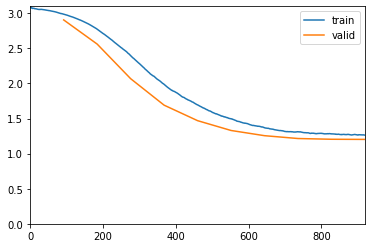

accuracy,▁▄▄▅▆▇▇████
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▃▆█▂▂▂▂▃▃▄▄▄▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
mom_0,█▆▃▁██▇▆▅▄▃▂▂▁▁▁▁▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▇▇▇█████
raw_loss,███▇▆▆▆▆▆▆▅▅▅▄▄▄▃▃▃▃▂▂▂▂▂▁▂▂▂▁▂▁▁▁▁▁▁▁▁▁
sqr_mom_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,████▆▆▆▆▆▆▆▅▅▅▅▄▄▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_loss,█▇▆▄▃▂▁▁▁▁▁
wd_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.87957


WandbCallback requires use of "SaveModelCallback" to log best model


epoch,train_loss,valid_loss,accuracy,time
0,3.016614,2.130821,0.889039,00:25


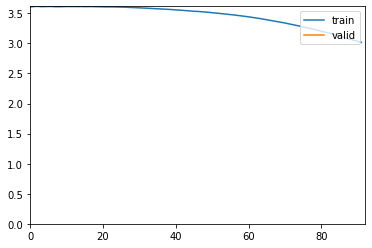

epoch,train_loss,valid_loss,accuracy,time
0,2.040768,1.824662,0.927605,00:25
1,1.655897,1.306046,0.946549,00:22
2,1.211985,0.965363,0.953992,00:23
3,0.939682,0.833569,0.956022,00:23
4,0.812053,0.797289,0.962788,00:24
5,0.762441,0.788186,0.958728,00:23
6,0.735150,0.780075,0.958728,00:23
7,0.718711,0.780595,0.963464,00:22
8,0.710123,0.776524,0.964817,00:22
9,0.708577,0.776440,0.963464,00:22


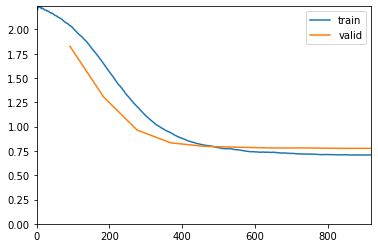

accuracy,▁▅▆▇▇█▇▇███
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▃▆█▂▂▂▂▃▃▄▄▄▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
mom_0,█▆▃▁██▇▆▅▄▃▂▂▁▁▁▁▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▇▇▇█████
raw_loss,██▇▆▅▄▄▄▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sqr_mom_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,███▇▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_loss,█▆▄▂▁▁▁▁▁▁▁
wd_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,0.96346


In [49]:
for model_name in ['mobilevit_s','mobilevit_xs','mobilevit_xxs', 'levit_384']:
    with wandb.init(project="pets-vit-benchmark", name=model_name):  
        model = create_model(model_name, pretrained=True, num_classes=dls.c)
        learn = Learner(dls, model, metrics=accuracy, loss_func=LabelSmoothingCrossEntropyFlat())
        learn.fine_tune(10, 2e-4, freeze_epochs=1, cbs=[WandbCallback(log_preds=False), ShowGraphCallback()])

WandbCallback requires use of "SaveModelCallback" to log best model


epoch,train_loss,valid_loss,accuracy,time
0,4.013888,1.838787,0.617727,00:19


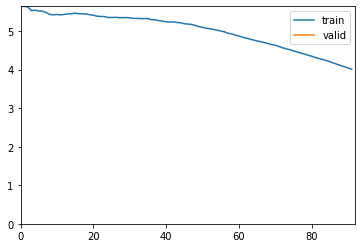

epoch,train_loss,valid_loss,accuracy,time
0,2.569657,1.552844,0.717185,00:20
1,2.199909,1.299011,0.804465,00:22
2,1.865424,1.199932,0.862652,00:22
3,1.656236,1.176364,0.877537,00:22
4,1.544044,1.161409,0.893099,00:20
5,1.485093,1.155604,0.896482,00:20
6,1.439377,1.150900,0.901218,00:21
7,1.402984,1.154411,0.902571,00:21
8,1.410347,1.147111,0.902571,00:20
9,1.382912,1.144596,0.901218,00:21


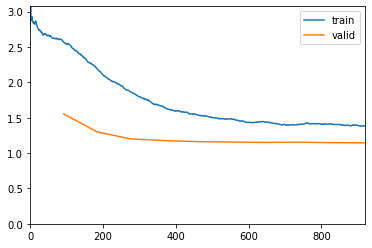

accuracy,▁▃▆▇▇██████
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
eps_0,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_1,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eps_2,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_0,▁▃▆█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
lr_1,▁▃▆█▂▂▂▂▃▃▄▄▄▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
lr_2,▁▃▆█▂▂▂▂▃▃▄▄▄▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁
mom_0,█▆▃▁██▇▆▅▄▃▂▂▁▁▁▁▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▇▇▇█████
mom_1,█▆▃▁██▇▆▅▄▃▂▂▁▁▁▁▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▇▇▇█████
mom_2,█▆▃▁██▇▆▅▄▃▂▂▁▁▁▁▁▁▂▂▂▃▃▃▄▄▅▅▅▆▆▇▇▇█████


In [50]:
with wandb.init(project="pets-vit-benchmark", name='resnet18'):
    learn = cnn_learner(dls, resnet18, metrics=accuracy, loss_func=LabelSmoothingCrossEntropyFlat())
    learn.fine_tune(10, 2e-4, freeze_epochs=1, cbs=[WandbCallback(log_preds=False), ShowGraphCallback()])